In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!cp /content/drive/My\ Drive/Bengali/valid_gray.zip /content/
#!cp /content/drive/My\ Drive/Bengali/train_gray.zip /content/

import os

!cp /content/drive/My\ Drive/Bengali/train_gen.csv /content/
!cp /content/drive/My\ Drive/Bengali/valid_gen.csv /content/

!mkdir /content/train/
!cp /content/drive/My\ Drive/Bengali/train.zip /content/train/
os.chdir('/content/train/')
!unzip train.zip
os.chdir('/content/')



!rm /content/train/train.zip

In [0]:
!pip uninstall tensorflow
!pip install tensorflow-gpu

In [1]:
import cv2
from tqdm import tqdm_notebook as tqdm
import os
import zipfile
import io
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
tf.__version__

'2.1.0'

# Classifying Graheme Roots

In [0]:
#!mkdir /content/valid_gray
#!mv valid_gray.zip /content/valid_gray/
#os.chdir('/content/valid_gray/')
#!unzip valid_gray.zip

#os.chdir('/content')

#!mkdir /content/train_gray/
#!mv train_gray.zip /content/train_gray/
#os.chdir('/content/train_gray/')
#!unzip train_gray.zip

#os.chdir('/content')

In [0]:
train_gen_df = pd.read_csv('train_gen.csv', dtype=str)
valid_gen_df = pd.read_csv('valid_gen.csv', dtype=str)

test_gen_df = train_gen_df[-2000:]
train_gen_df = train_gen_df[:-2000]

### 168 unique target classes to train on

In [0]:
from tensorflow.keras.layers import Dense,BatchNormalization,MaxPool1D,Input,Dropout,Conv1D,Conv2D,Flatten,MaxPool2D,LeakyReLU # keras layers
from tensorflow.keras.models import Model #Model class
from tensorflow.keras.optimizers import Adam #optimizer
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping

In [0]:
model = keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(LeakyReLU(alpha=0.17))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(LeakyReLU(alpha=0.17))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(LeakyReLU())
model.add(Dropout(rate=0.35))
model.add(BatchNormalization(momentum=0.15))
model.add(Dropout(rate=0.3))
model.add(Dense(192, activation = "relu"))
model.add(Dense(1, activation = 'relu'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_gen_df,
        directory='/content/train/',
        x_col="images",
        y_col="class",
        target_size=(128, 128),
        batch_size=32)

validation_generator = test_datagen.flow_from_dataframe(
        dataframe=valid_gen_df,
        directory='/content/train/',
        x_col="images",
        y_col="class",
        target_size=(128, 128),
        batch_size=32)

Found 197840 validated image filenames belonging to 168 classes.
Found 1000 validated image filenames belonging to 149 classes.


In [11]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history = model.fit(train_generator,
                              validation_data=validation_generator,
                              validation_steps=STEP_SIZE_VALID,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              epochs=3)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 6182 steps, validate for 31 steps
Epoch 1/3
6182/6182 [==============================] - 815s 132ms/step - loss: 0.0060 - mae: 0.0060 - val_loss: 0.0067 - val_mae: 0.0067
Epoch 2/3
6182/6182 [==============================] - 809s 131ms/step - loss: 0.0060 - mae: 0.0060 - val_loss: 0.0067 - val_mae: 0.0067
Epoch 3/3
6182/6182 [==============================] - 808s 131ms/step - loss: 0.0060 - mae: 0.0060 - val_loss: 0.0067 - val_mae: 0.0067


In [0]:
import h5py
os.chdir('/content/')
model.save("model_trial3.h5")

In [13]:
from google.colab import files
files.download('/content/model_trial3.h5')

MessageError: ignored

In [0]:
acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

hist_df = pd.DataFrame({'mae':acc, 'val_mae':val_acc, 'loss':loss, 'val_loss':val_loss})
hist_df.to_csv('hist_trial3.csv', index=False)

In [15]:
import time
time.sleep(2000000)

KeyboardInterrupt: ignored

In [0]:
!cp /content/model_trial3.h5 /content/drive/My\ Drive/Bengali/
!cp /content/hist_trial3.csv /content/drive/My\ Drive/Bengali/

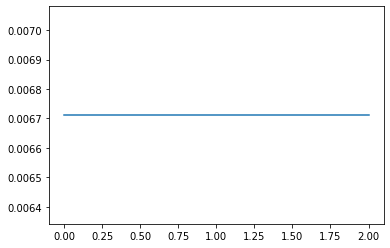

In [22]:
plt.plot(history.history['val_mae'])

In [0]:
!cp /content/drive/My\ Drive/Bengali/model_trial3.h5 /content/

In [8]:
from tensorflow.keras.models import load_model
import h5py
model = load_model('model_trial3.h5')

In [12]:
test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_gen_df,
        directory='/content/train/',
        x_col="images",
        y_col="class",
        target_size=(128, 128),
        batch_size=32)

Found 2000 validated image filenames belonging to 163 classes.


In [16]:
model.evaluate(test_generator)

  ...
    to  
  ['...']
63/63 [==============================] - 1s 20ms/step - loss: 0.0061 - mae: 0.0061


[0.0061349691823124886, 0.0061349664]